In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import h5py

In [2]:
subject = 1
session = 1
block = 1

data_path = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2/preprocessed_eeg"
nsd_mat_file_path = '../final_dataset/nsd_expdesign.mat'
image_path =  "/srv/eeg_reconstruction/shared/natural_scenes_dataset/nsd_stimuli.hdf5"

In [5]:
file_path = os.path.join(data_path, "sub-0" + str(subject), "preprocessed_eeg_training.npy")
data = np.load(file_path, allow_pickle=True)

In [6]:
eeg_data = data["preprocessed_eeg_data"]
eeg_data.shape

(768, 4, 64, 309)

In [17]:
def get_nsd_indices(mat_contents, subject, session):
    """
    Returns the NSD image ID for a given subject, session, and id.

    Parameters:
    - mat_contents: The contents loaded from the .mat file.
    - subject: The subject number (1-indexed).
    - session: The session number (1-indexed).
    - id: The index within the session (0-999).

    Returns:
    - Image ID corresponding to the specified subject, session, and id.
    """

    if session % 2 == 0:  # For even sessions, use shared images
        indices = mat_contents['sharedix'][0]
    else:
        indices = mat_contents['subjectim'][subject - 1]  # Adjust for 0-indexing

    # Fetch and return the image ID using the global index.
    return indices

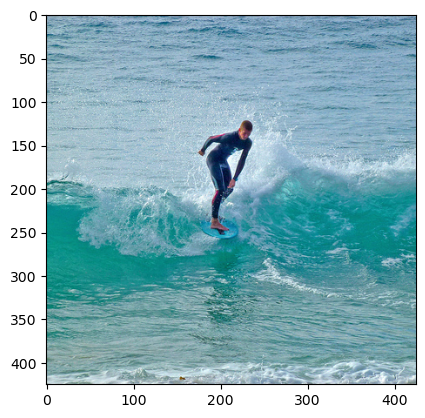

In [62]:
mat_contents = loadmat(nsd_mat_file_path)
nsd_indices = get_nsd_indices(mat_contents, subject, session)

image_index = 2 # assume zero indexed
nsd_index = nsd_indices[image_index] - 1 # It's now 0 indexed

images = None
with h5py.File(image_path, 'r') as f:
    # Access the dataset
    images = f['imgBrick']
    plt.imshow(images[nsd_index])

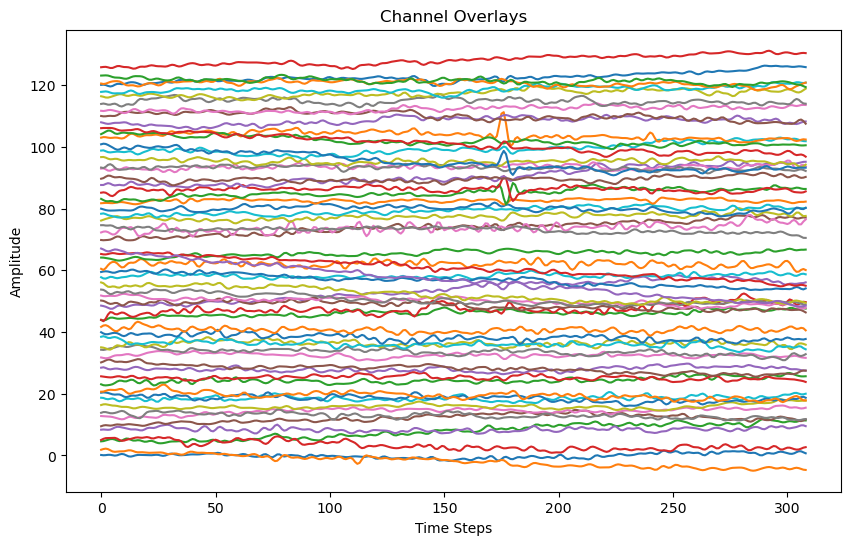

In [71]:
trial = 3

plt.figure(figsize=(10, 6))
for i in range(eeg_data[2][trial].shape[0]):
    plt.plot(eeg_data[2][trial][i] + 2 * i, label=f'Channel {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.title('Channel Overlays')
plt.show()